<a href="https://colab.research.google.com/github/elliotb01/linear-regression-machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
houses = pd.DataFrame(pd.read_csv("/content/house_data.csv"))

# Data Inspection

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

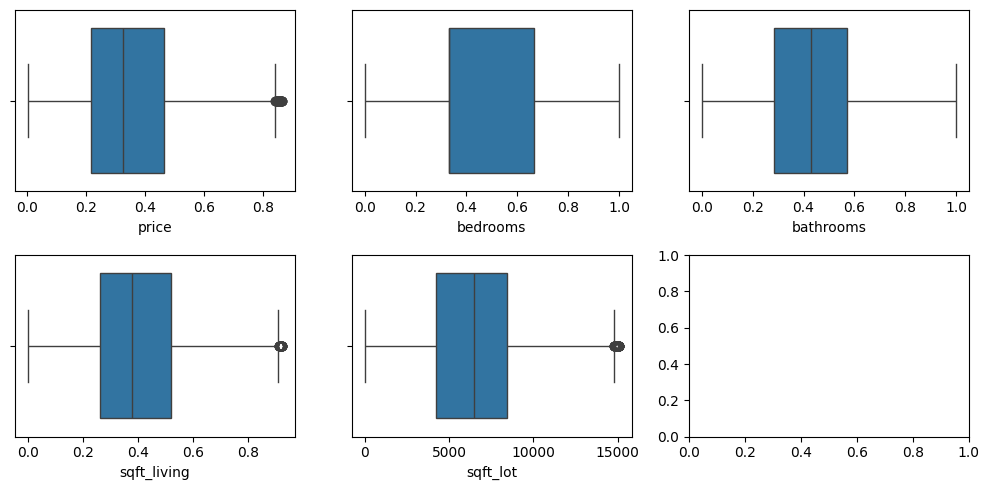

In [120]:
# Data Cleaning

# Checking for any Null Values

houses.isnull().sum()*100/houses.shape[0]

# Looking for outliers

fig, axis = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(x=houses['price'], ax = axis[0,0])
plt2 = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
plt3 = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
plt1 = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
plt2 = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])


plt.tight_layout()

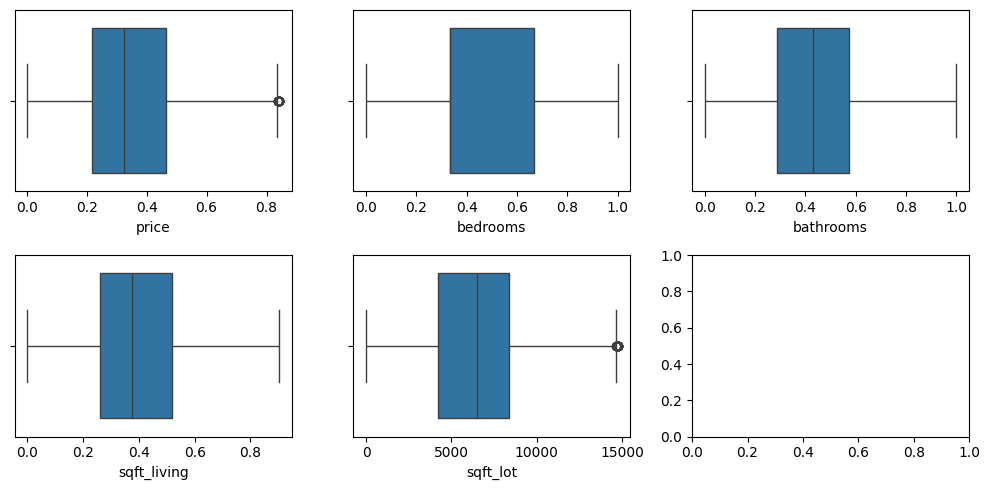

In [122]:
def outlier_remove(df, column):
  IQR = df[column].max() - df[column].min()
  removed_outliers = df[df[column] < IQR]
  #return removed_outliers

outlier_remove(houses, 'price')
outlier_remove(houses, 'bedrooms')
outlier_remove(houses, 'bathrooms')
outlier_remove(houses, 'sqft_living')
outlier_remove(houses, 'sqft_lot')

fig, axis = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(x=houses['price'], ax = axis[0,0])
plt2 = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
plt3 = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
plt1 = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
plt2 = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])


plt.tight_layout()



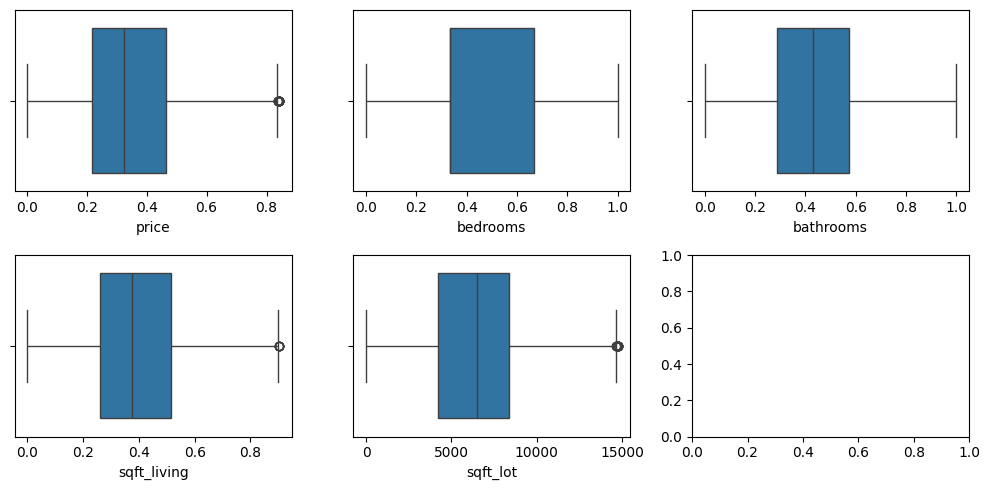

In [123]:
# Outlier Removal

fig, axis = plt.subplots(2,3, figsize = (10,5))

price_plt = sns.boxplot(x=houses['price'], ax = axis[0,0])
price_Q1 = houses.price.quantile(0.25)
price_Q3 = houses.price.quantile(0.75)
price_IQR = price_Q3 - price_Q1
houses = houses[(houses.price >= price_Q1 - 1.5 * price_IQR) & (houses.price <= price_Q3 + 1.5 * price_IQR)]

bedrooms_plt = sns.boxplot(x=houses['bedrooms'], ax = axis[0,1])
bedrooms_Q1 = houses.bedrooms.quantile(0.25)
bedrooms_Q3 = houses.bedrooms.quantile(0.75)
bedrooms_IQR = bedrooms_Q3 - bedrooms_Q1
houses = houses[(houses.bedrooms >= bedrooms_Q1 - 1.5 * bedrooms_IQR) & (houses.bedrooms <= bedrooms_Q3 + 1.5 * bedrooms_IQR)]

bathrooms_plt = sns.boxplot(x=houses['bathrooms'], ax = axis[0,2])
bathrooms_Q1 = houses.bathrooms.quantile(0.25)
bathrooms_Q3 = houses.bathrooms.quantile(0.75)
bathrooms_IQR = bathrooms_Q3 - bathrooms_Q1
houses = houses[(houses.bathrooms >= bathrooms_Q1 - 1.5 * bathrooms_IQR) & (houses.bathrooms <= bathrooms_Q3 + 1.5 * bathrooms_IQR)]

sqft_living_plt = sns.boxplot(x=houses['sqft_living'], ax = axis[1,0])
sqft_living_Q1 = houses.sqft_living.quantile(0.25)
sqft_living_Q3 = houses.sqft_living.quantile(0.75)
sqft_living_IQR = sqft_living_Q3 - sqft_living_Q1
houses = houses[(houses.sqft_living >= sqft_living_Q1 - 1.5 * sqft_living_IQR) & (houses.sqft_living <= sqft_living_Q3 + 1.5 * sqft_living_IQR)]

sqft_lot_plt = sns.boxplot(x=houses['sqft_lot'], ax = axis[1,1])
sqft_lot_Q1 = houses.sqft_lot.quantile(0.25)
sqft_lot_Q3 = houses.sqft_lot.quantile(0.75)
sqft_lot_IQR = sqft_lot_Q3 - sqft_lot_Q1
houses = houses[(houses.sqft_lot >= sqft_lot_Q1 - 1.5 * sqft_lot_IQR) & (houses.sqft_lot <= sqft_lot_Q3 + 1.5 * sqft_lot_IQR)]

plt.tight_layout()

In [114]:
# Initialise training model

from sklearn.model_selection import train_test_split

# Taking houses and splitting 70/30 for train/test

np.random.seed(0)
df_train, df_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 100)




In [115]:
# Manual data normalisation (No sklearn MinMaxScaler)

houses_price_range = houses.price.max() - houses.price.min()
houses_bedrooms_range = houses.bedrooms.max() - houses.bedrooms.min()
houses_bathrooms_range = houses.bathrooms.max() - houses.bathrooms.min()
houses_sqft_living_range = houses.sqft_living.max() - houses.sqft_living.min()
houses_sqft_lot_range = houses.sqft_lot.max() - houses.sqft_lot.min()

houses.price = (houses.price - houses.price.min()) / houses_price_range
houses.bedrooms = (houses.bedrooms - houses.bedrooms.min()) / houses_bedrooms_range
houses.bathrooms = (houses.bathrooms - houses.bathrooms.min()) / houses_bathrooms_range
houses.sqft_living = (houses.sqft_living - houses.sqft_living.min()) / houses_sqft_living_range
houses.sqft_lot = (houses.sqft_lot - houses.sqft_lot.min())


In [116]:
# sklearn data normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

df_train[variables] = scaler.fit_transform(df_train[variables])